# Torchivision을 활용한 영상 인식

## Torchvision이란?

**Torchvision**

- PyTorch의 공식 컴퓨터비전 라이브러리
- 이미지 분류, 객체 검출, 세그맨테이션 등 다양한 컴퓨터 비전을 손쉽게 수행할 수 있도록 돕는 도구
- `torchvision` 라이브러리 임포트

**주요 기능**

1. 데이터셋 로딩

- 다양한 공개 데이터셋 다운로드 및 로드 *가능*
- MNIST, CIFAR-10, COCO, ImageNet 등

In [ ]:
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

2. 모델
- `torchivision.models`에서 다양한 사전학습(pretrained) 모델 제공
- 모델을 처음부터 학습하지 않고 바로 사용 가능
- 사전학습된 모델을 사용하여 빠르게 전이 학습(transfrer learning)을 하거나, fine-tuning을 할 수 있음

- 이미지 분류(Image classification), 객체 검출(Object detection) 및 세그맨테이션(Segmentation)을 위한 모델 제공

- https://docs.pytorch.org/vision/main/models.html

  **주요모델**

| **분류**     | **모델명**                      | **모듈명**                                                        |
| ---------- | ---------------------------- | -------------------------------------------------------------- |
| **이미지 분류** | AlexNet                   | `torchvision.models.alexnet`                                  |
| **이미지 분류** | ResNet-50                    | `torchvision.models.resnet50`                                  |
| **이미지 분류** | VGG-16                       | `torchvision.models.vgg16`                                     |
| **이미지 분류** | EfficientNet-B0              | `torchvision.models.efficientnet_b0`                           |
| **객체 검출**  | Faster R-CNN                 | `torchvision.models.detection.fasterrcnn_resnet50_fpn`         |
| **객체 검출**  | RetinaNet             | `torchvision.models.detection.retinanet_resnet50_fpn`            |
| **객체 검출/세그맨테이션**  | Mask R-CNN   | `torchvision.models.detection.maskrcnn_resnet50_fpn`   |
| **세그멘테이션** | U-Net (Pretrained)    | `torchvision.models.segmentation.deeplabv3_resnet50`             |

*참고: YOLOv5 이상의 모델은 Ultralytics에서 제공합니다.

** 트랜스포머 모델은 각각의 라이브러리에서 제공합니다.

In [ ]:
from torchvision import models

In [ ]:
# Classification 모델
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


3. 이미지 전처리 및 변환
- `torchvision.transforms`
- 이미지 전처리 및 데이터 증강(Data augmentation)을 위한 다양한 기능 제공
- 회전, 크기 변경, 크롭, 색상 조정 등
- 데이터 로드 혹은 모델 학습 전에 이미지 변형 및 증강 가능

In [ ]:
from torchvision import transforms

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # 플립
    transforms.RandomRotation(30), # 회전
    transforms.ToTensor()
])

## GPU 설정

파이토치에서 GPU를 사용하여 모델을 학습하려면 `torch.device` 설정이 필요합니다.

또한, 불러온 모델과 데이터를 `.to(device)`를 이용해 GPU로 옮겨야합니다.

**반드시 모델과 데이터는 같은 device에 존재해야 함*

GPU 사용에 앞서 GPU가 사용가능한지 확인해봅니다.

In [ ]:
# GPU 사용 가능 확인 코드
torch.cuda.is_available()

True

In [ ]:
# 사용 가능한 GPU의 수
torch.cuda.device_count()

1

GPU 사용 설정

In [ ]:
#  GPU 사용 가능 여부를 동적으로 확인하여, GPU가 사용 가능한 경우 "cuda"로 설정하고, 그렇지 않으면 "cpu"로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 0번 gpu 사용 시(반드시 번호가 일치하는 gpu가 존재해야 동작)
device = torch.device("cuda:0")

GPU로 모델 및 데이터 옮기기

In [ ]:
#모델
model = torchvision.models.resnet18(pretrained=True)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 데이터
images = torch.randn(64, 3, 224, 224)
images = images.to(device)

In [ ]:
# 모델 및 데이터의 위치 확인
print(next(model.parameters()).device)
print(images.device)

cuda:0
cuda:0


In [ ]:
# 모델 및 데이터가 cpu에 있을 때
images = images.cpu()
print(images.device)

cpu


## 실습


**ResNet-18로 MNIST 분류하기**

런타임 유형을 GPU 혹은 TPU로 설정해주세요.

(1) 필요한 라이브러리 불러오기

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

(2) 하이퍼파라미터 설정


iter = 이미지수/배치크기 = 한 epoch 당 반복 수

MNIST의 학습 집합: 60,000 장

배치가 32일 경우: iter = 60000/32 = 1825

테스트 집합: 10,000 장

iter = 10000/32 = 313

배치가 클수록 학습이 빨라지지만 메모리 점유율이 높아지고 일반화 성능이 떨어질 수 있습니다.

배치가 커지는 만큼 학습률도 늘려야 수렴 속도가 나빠지지 않습니다.

경우에 따라 epoch 수를 늘려야할 수 있습니다.

(실습에서는 빠른 학습을 위해 큰 배치와 학습률을 권장합니다. batch size=32, epochs=5 기준 20분 소요, 정확도 99.12%)

In [ ]:
class_num = 10           # 클래스 개수
batch_size = 64         # 배치 크기
learning_rate = 0.001    # 학습률
epochs = 5              # 에포크 수

(3) 데이터셋 다운로드 및 로드

**MNIST 데이터셋**

숫자 손글씨 데이터셋으로, 딥러닝을 처음 시작할 때 배우기 좋은 데이터셋입니다.

`torchvision`에서 제공하는 데이터셋을 불러와 사용하겠습니다.

향후 다른 데이터셋으로 학습을 할 때에는 전체적인 구조는 비슷하고 데이터 부분만 바꿔주면 됩니다.


In [ ]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=3),  # MNIST 이미지를 3채널로 변환(ResNet 모델은 3채널 이미지 입력)
                                transforms.Resize((224, 224)),  # 이미지 리사이즈 - ResNet에 맞는 크기로 조정((28,28)-->(224,224))
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 위 변환 과정은 결과적으로 (28,28,1)의 mnist 데이터를 ResNet 모델 입력에 맞추어 (224,224,3)으로 변환해줍니다.

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

(4) 모델 로드

In [ ]:
model = torchvision.models.resnet18(pretrained=True)  # ResNet-18 모델 불러오기
model.fc = nn.Linear(model.fc.in_features, class_num)  # MNIST는 10개의 클래스, 출력층 수정

(5) GPU 설정

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # 모델을 GPU로 옮기기

(5) 손실 함수 및 옵티마이저

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류에 적합한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam 옵티마이저

(6) 모델 학습

In [ ]:
# 진행 과정을 보여주는 모듈 추가
import tqdm

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0
    # for images, labels in trainloader: # tqdm 미사용 시
    for images, labels in tqdm.tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", ncols=100, total=len(trainloader)): # tqdm 사용 시
        # 데이터를 GPU로 옮기기
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # 이전 gradient 초기화

        outputs = model(images)  # 모델 예측
        loss = criterion(outputs, labels)  # loss 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 갱신

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print('훈련 완료')

Epoch 1/5: 100%|████████████████████████████████████████████████| 1875/1875 [04:22<00:00,  7.14it/s]


Epoch 1, Loss: 0.05761354317643369


Epoch 2/5: 100%|████████████████████████████████████████████████| 1875/1875 [04:23<00:00,  7.11it/s]


Epoch 2, Loss: 0.03854652078385212


Epoch 3/5: 100%|████████████████████████████████████████████████| 1875/1875 [04:23<00:00,  7.11it/s]


Epoch 3, Loss: 0.03063104035446498


Epoch 4/5: 100%|████████████████████████████████████████████████| 1875/1875 [04:24<00:00,  7.08it/s]


Epoch 4, Loss: 0.026645903798208262


Epoch 5/5: 100%|████████████████████████████████████████████████| 1875/1875 [04:22<00:00,  7.13it/s]

Epoch 5, Loss: 0.02092395752632874
훈련 완료


(7) 평가

In [ ]:
# 분류문제이기 때문에 accuracy를 계산합니다.
correct = 0
total = 0
with torch.no_grad():  # 추론 시에 gradient 계산을 하지 않음
    for images, labels in testloader:
        # 데이터를 GPU로 옮기기
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"테스트 정확도: {100 * correct / total}%")

테스트 정확도: 99.12%


(8)결과 시각화

In [ ]:
# 테스트 데이터 중 랜덤한 이미지 로드
dataiter = iter(testloader)
images, labels = next(dataiter)

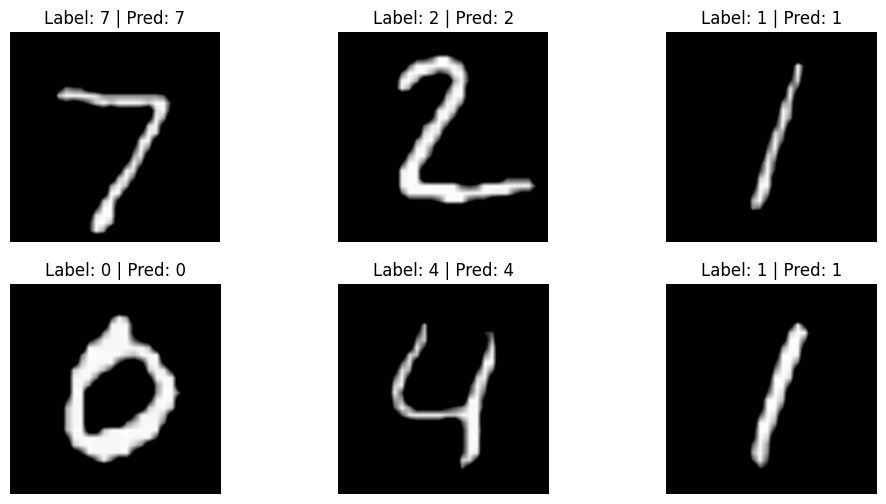

In [ ]:
# 이미지 출력
model.eval() # 평가 모드

plt.figure(figsize=(12, 6))
with torch.no_grad():
  for i in range(6):
      ax = plt.subplot(2, 3, i+1)
      image_gpu = images[i].unsqueeze(0).to(device) # # (1, 1, 28, 28) 형태로 GPU 올리기

      ax.imshow(images[i].numpy().transpose((1, 2, 0)), cmap="gray")  # 채널 순서 변경
      ax.set_title(f'Label: {labels[i]} | Pred: {model(image_gpu).argmax(1).item()}')
      ax.axis('off')
plt.show()